<a href="https://colab.research.google.com/github/Enoch-lab/CAT-Scan-Localization/blob/Dev/Project_AI_slice_localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Dataset**

In [ ]:
import pandas as pd

file_path = '/content/slice_localization_data.csv'
df = pd.read_csv(file_path)

# **EDA**

In [ ]:
df.head()

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.980381,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.803851
1,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.745726
2,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.687600
3,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.629474
4,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.976833,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.571348


In [ ]:
dataset_shape = df.shape
print("Dataset shape:", dataset_shape)

Dataset shape: (53500, 386)


In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

categorical_count = len(categorical_columns)
numerical_count = len(numerical_columns)

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)
print("Number of categorical columns:", categorical_count)
print("Number of numerical columns:", numerical_count)

Categorical columns: Index([], dtype='object')
Numerical columns: Index(['patientId', 'value0', 'value1', 'value2', 'value3', 'value4', 'value5',
       'value6', 'value7', 'value8',
       ...
       'value375', 'value376', 'value377', 'value378', 'value379', 'value380',
       'value381', 'value382', 'value383', 'reference'],
      dtype='object', length=386)
Number of categorical columns: 0
Number of numerical columns: 386


In [ ]:
# Check for null values
null_counts = df.isnull().sum()
print("Null value counts:")
print(null_counts)

Null value counts:
patientId    0
value0       0
value1       0
value2       0
value3       0
            ..
value380     0
value381     0
value382     0
value383     0
reference    0
Length: 386, dtype: int64


In [ ]:
# Check for null values
null_counts = df.isnull().sum()
print("Columns with null values:")
for column, count in null_counts.items():
    if count > 0:
        print(f"{column}: {count} null values")

Columns with null values:


From the above dataset, we can see that variables named as ‘value0’, ‘value1’,.. ‘value383’ contain feature values of CT scan images for each patient. The last variable is ‘reference’. This ‘reference’ is our target variable and it contains the relative location of the CT slice.


In [ ]:
df.describe(include='all')

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
count,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,...,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000,53500.000000
mean,47.075701,0.059627,0.071558,0.145819,0.218728,0.274762,0.276189,0.204531,0.062281,-0.042025,...,-0.029404,0.182913,0.320112,0.359373,0.342889,0.266091,0.083049,-0.031146,-0.154524,47.028039
std,27.414240,0.174243,0.196921,0.300270,0.359163,0.378862,0.369605,0.351294,0.292232,0.268391,...,0.085817,0.383333,0.463517,0.478188,0.471811,0.437633,0.279734,0.098738,0.122491,22.347042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,-0.250000,...,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,1.738733
25%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,29.891607
50%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,43.987893
75%,70.000000,0.000000,0.000000,0.000000,0.446429,0.684477,0.662382,0.441412,0.000000,0.000000,...,0.000000,0.000000,0.996286,0.999677,0.999560,0.949478,0.000000,0.000000,0.000000,63.735059
max,96.000000,1.000000,1.000000,1.000000,1.000000,0.998790,0.996468,0.999334,1.000000,1.000000,...,0.961279,1.000000,1.000000,1.000000,1.000000,1.000000,0.999857,0.996839,0.942851,97.489115


In [ ]:
# Getting unqiue values of the "Patient ID"
import numpy as np

np.unique(df["patientId"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96])

In [ ]:
print(df.columns)

Index(['patientId', 'value0', 'value1', 'value2', 'value3', 'value4', 'value5',
       'value6', 'value7', 'value8',
       ...
       'value375', 'value376', 'value377', 'value378', 'value379', 'value380',
       'value381', 'value382', 'value383', 'reference'],
      dtype='object', length=386)


In [ ]:
#dropping off unnecessary variable ‘patientId’, separating features and target variables.

df_copy = df.drop(['patientId'], axis=1)
df_y = df_copy['reference']
df_x = df_copy.drop(['reference'], axis=1)



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: ylabel='Density'>

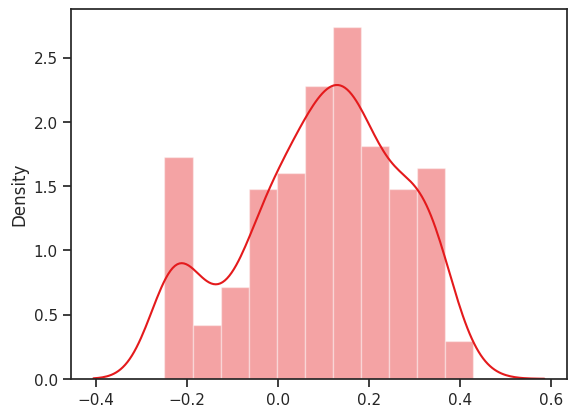

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot "Means of each column in dataset( Attributes ) except first and last column"  distplot
sns.distplot(df_x.mean())

# ===> We can conclude all of our attributes are in [-1,1] range, so we don't need to use feature normalize technique

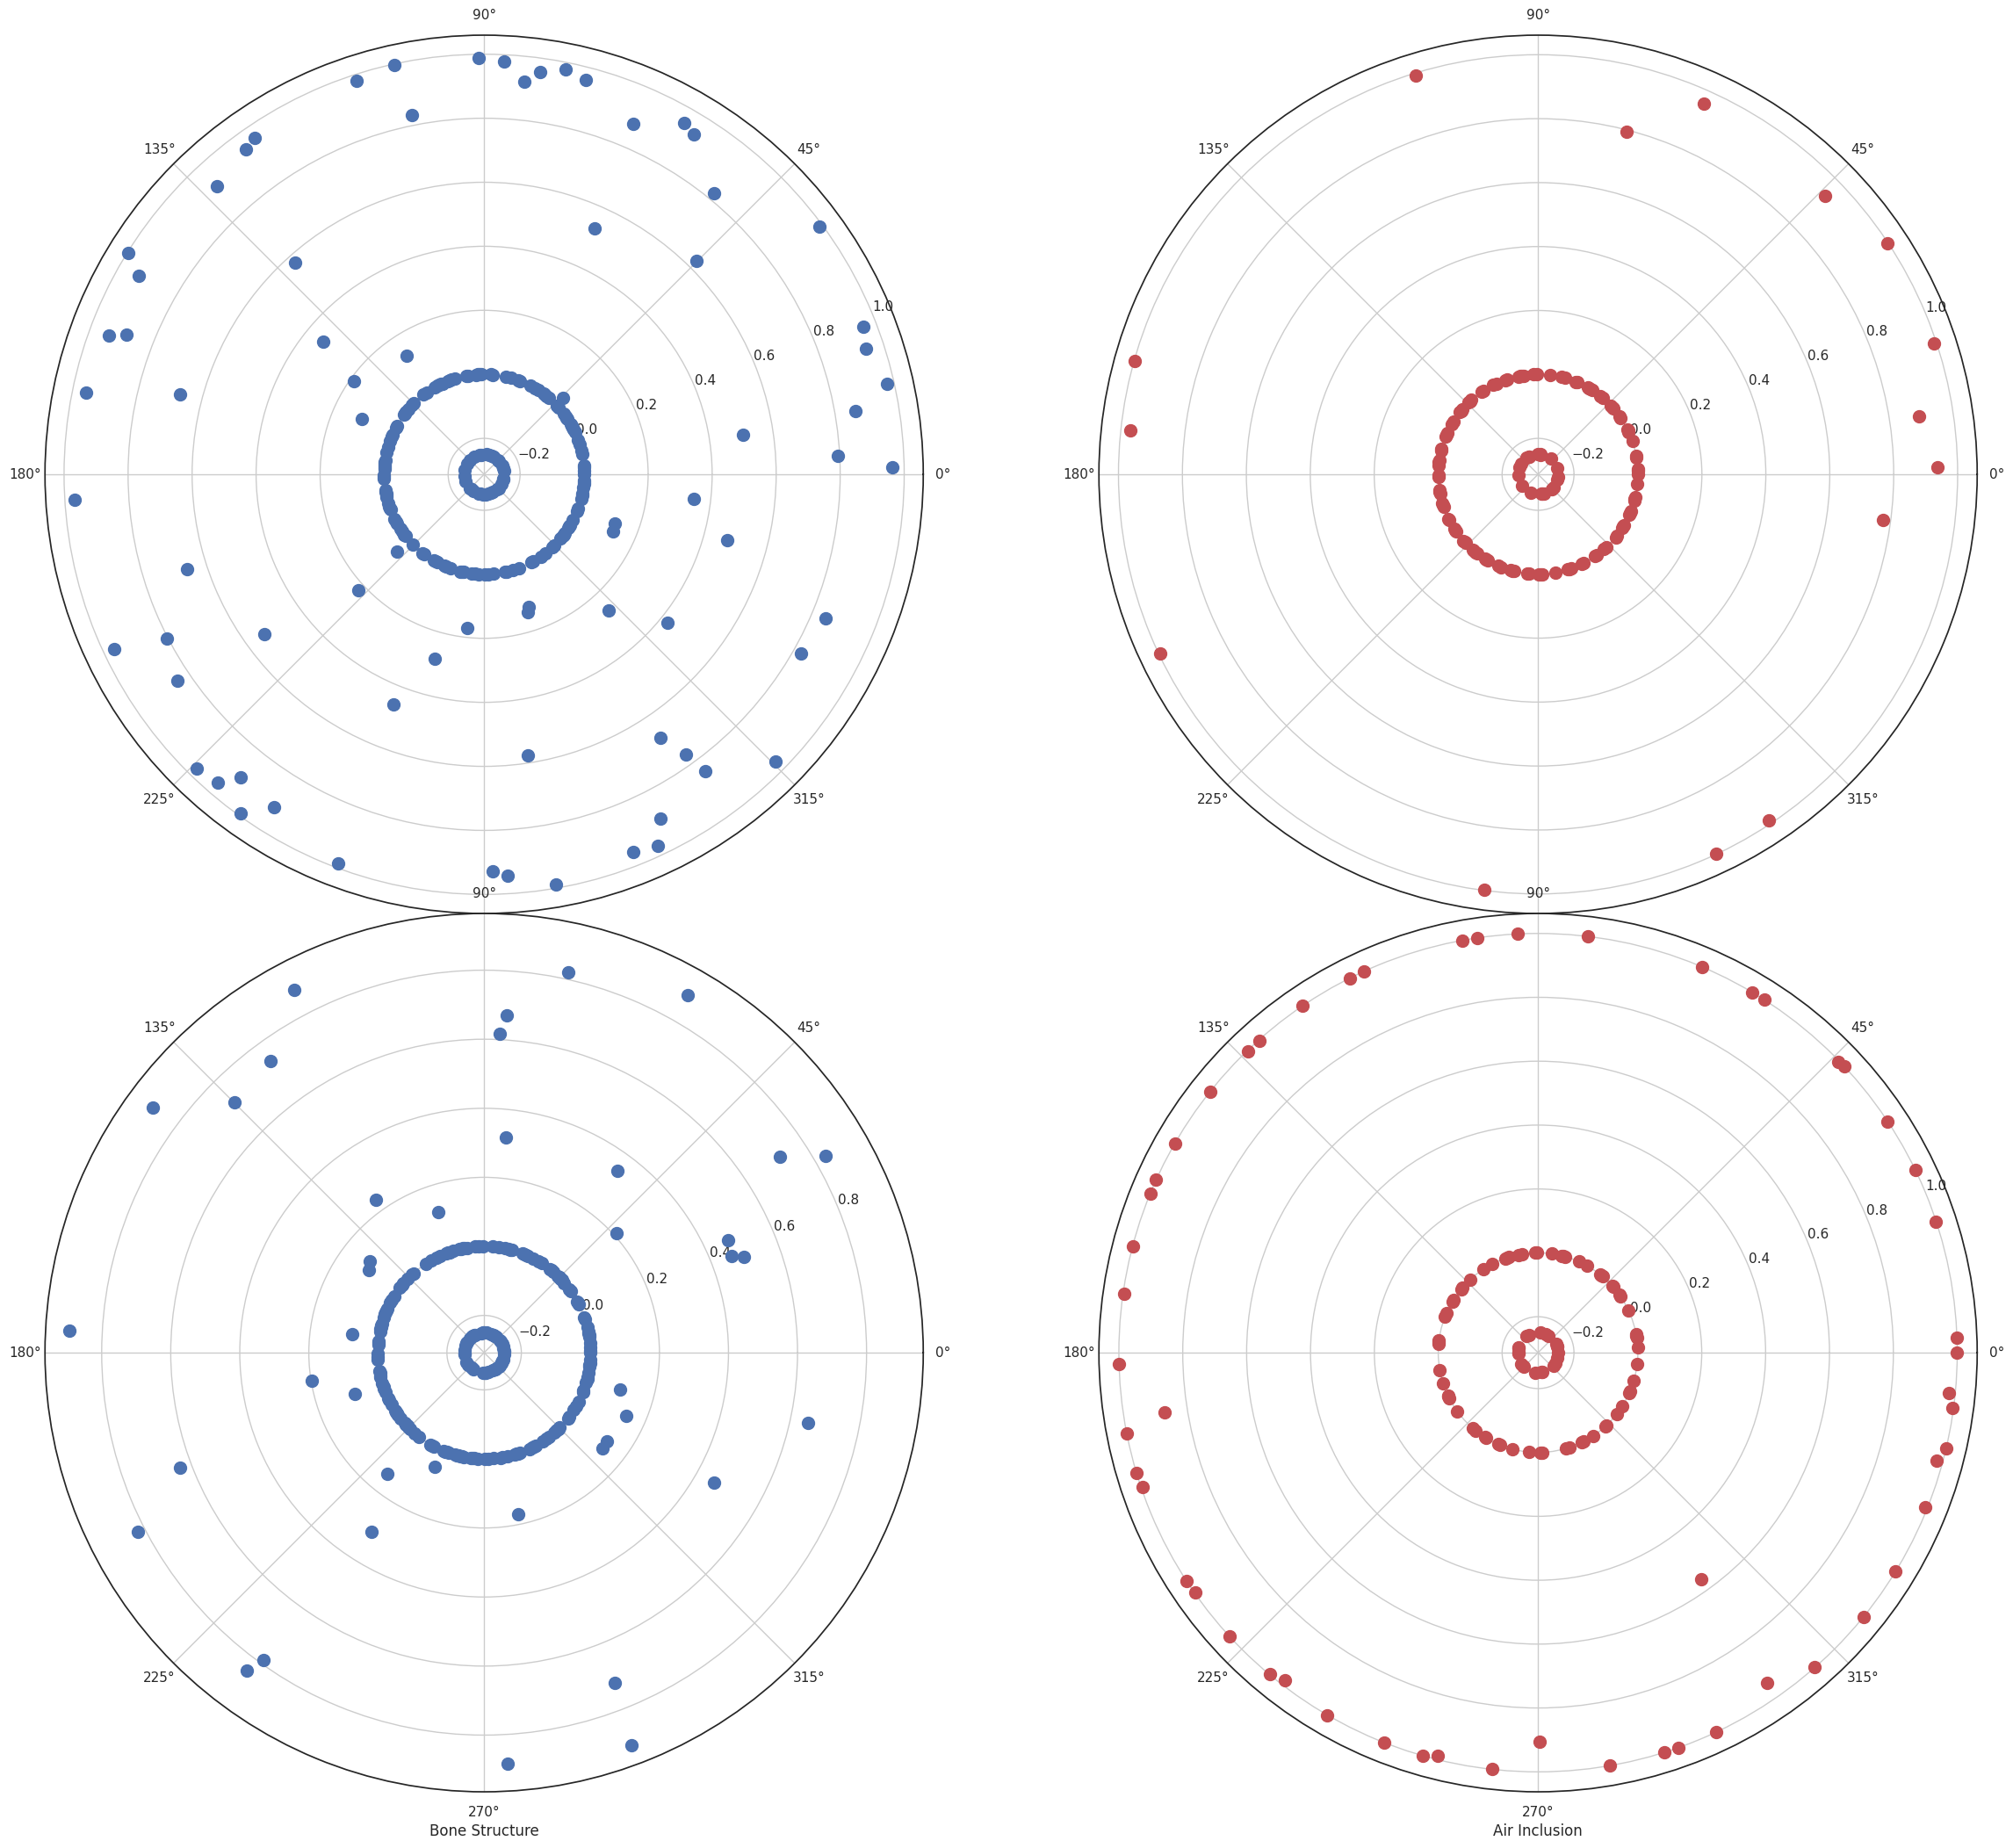

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the DataFrame to a NumPy array for plotting
X = df_x.values

# Create the figure and axes for the polar plots
fig = plt.figure(figsize=(12, 10))

axes1 = fig.add_axes([0, 2, 1, 1], projection='polar')
axes2 = fig.add_axes([1, 2, 1, 1], projection='polar')
axes3 = fig.add_axes([0, 1, 1, 1], projection='polar')
axes4 = fig.add_axes([1, 1, 1, 1], projection='polar')

# Plotting first example of bone structure of the one person
axes1.plot(X[150, 1:241], 'bo', ms=10)
axes1.set_xlabel("Bone Structure")

# Plotting first example of air inclusion of the one person
axes2.plot(X[150, 241:386], 'ro', ms=10)
axes2.set_xlabel("Air Inclusion")

# Plotting second example of bone structure of the one person
axes3.plot(X[3541, 1:241], 'bo', ms=10)
axes3.set_xlabel("Bone Structure")

# Plotting second example of air inclusion of the one person
axes4.plot(X[3541, 241:386], 'ro', ms=10)
axes4.set_xlabel("Air Inclusion")

plt.show()



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='reference', ylabel='Density'>

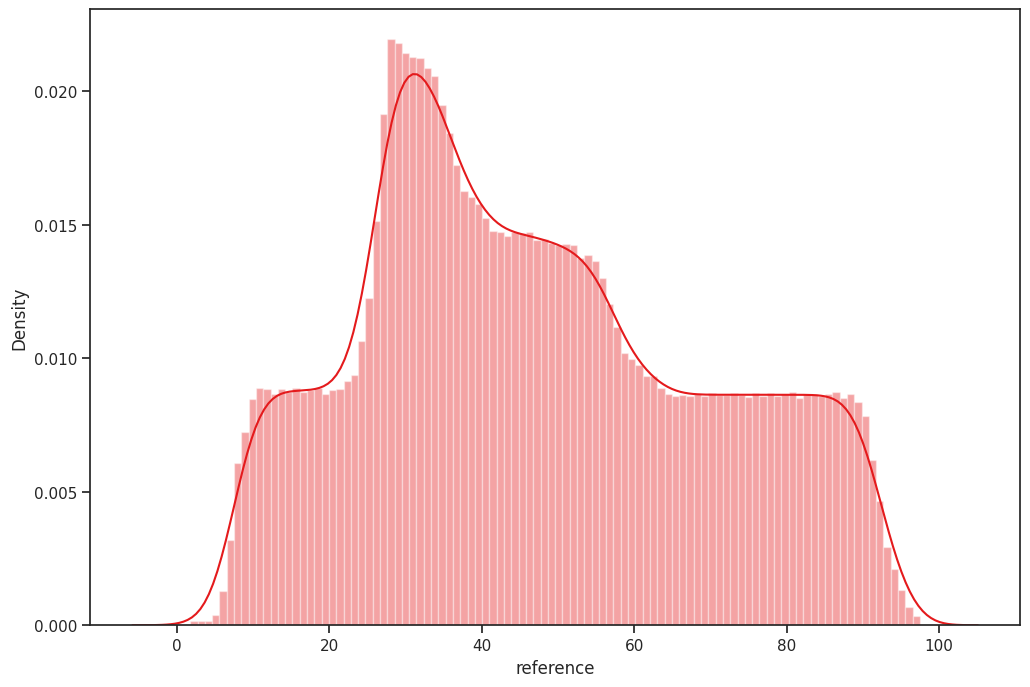

In [ ]:
# Plot "Reference" column distplot
import seaborn as sns
plt.figure(figsize=(12,8))
sns.distplot(df_y, bins=100)

# ==> We can see that we don't have any image for locations of body with value bigger than 100, and majority of the
# images are taken with values in [25,40] range

Split the Data

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

# View the split data
print("X_train:")
print(X_train.head())
print("\nX_test:")
print(X_test.head())
print("\ny_train:")
print(y_train.head())
print("\ny_test:")
print(y_test.head())

X_train:
         value0    value1    value2    value3    value4    value5    value6  \
19113  0.000000  0.000000  0.000000  0.000000  0.939018  0.965932  0.873580   
40279  0.114286  0.020930  0.000000  0.963090  0.680756  0.558228  0.439762   
42189  0.000000  0.000000  0.000000  0.751979  0.000000  0.842081  0.904479   
30994  0.000000  0.000000  0.914286  0.855310  0.893836  0.000000  0.000000   
19373  0.000000  0.267206  0.904605  0.972478  0.856772  0.000000  0.000000   

         value7    value8  value9  ...  value374  value375  value376  \
19113  0.000000  0.000000   -0.25  ...       0.0       0.0  0.000000   
40279  0.898336  0.741252    0.00  ...       0.0       0.0  0.000000   
42189  0.943744  0.699692    0.00  ...       0.0       0.0  0.994347   
30994  0.000000  0.000000   -0.25  ...       0.0       0.0  0.000000   
19373  0.000000  0.000000   -0.25  ...       0.0       0.0  0.000000   

       value377  value378  value379  value380  value381  value382  value383  
19113

# **Apply Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
#for test dataset

y_pred_linear_test = lm.predict(X_test)

mse = mean_squared_error(y_test, y_pred_linear_test)
mae = mean_absolute_error(y_test, y_pred_linear_test)
r2 = r2_score(y_test, y_pred_linear_test)

print('Test Set Mean Squared Error:', mse)
print('Test Set Mean Absolute Error:', mae)
print('Test Set R-squared:', r2)

Test Set Mean Squared Error: 68.29434562989341
Test Set Mean Absolute Error: 6.123343272084307
Test Set R-squared: 0.8624473194580933


In [ ]:
#for training dataset

y_pred_linear_train = lm.predict(X_train)

mse = mean_squared_error(y_train, y_pred_linear_train)
mae = mean_absolute_error(y_train, y_pred_linear_train)
r2 = r2_score(y_train, y_pred_linear_train)

print('Train Set Mean Squared Error:', mse)
print('Train Set Mean Absolute Error:', mae)
print('Train Set R-squared:', r2)

Train Set Mean Squared Error: 67.82275427597651
Train Set Mean Absolute Error: 6.10251339719793
Train Set R-squared: 0.8645188670291543


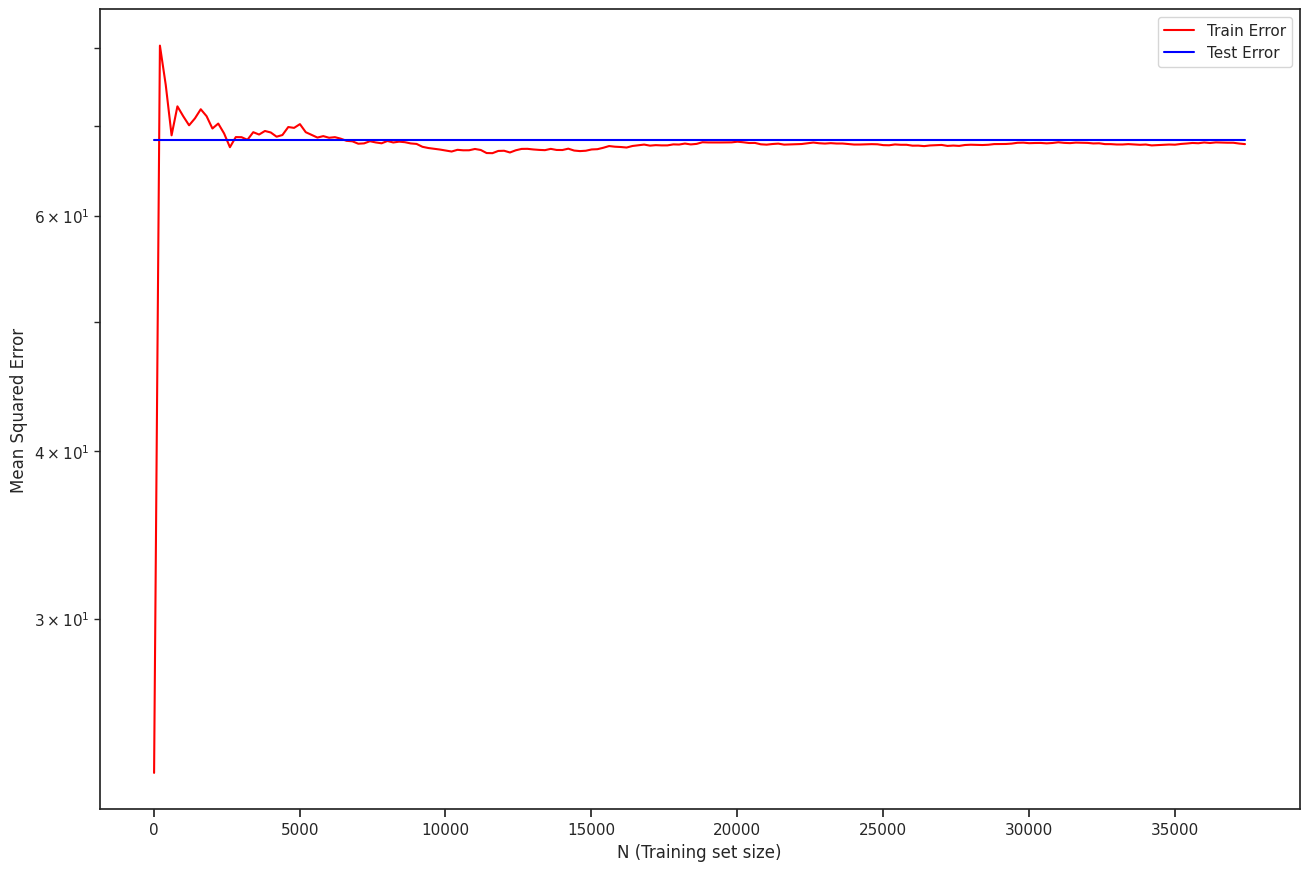

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
# Define the function to plot learning curves
def plotLearningCurves(X, y, step):
    m, n = X.shape
    maxVal = (int)(m / 10) * 10
    N_size_arr = np.arange(10, maxVal + 10, step)
    error_arr = np.zeros((len(N_size_arr), 2))  # Updated line
    index = 0

    # Fitting Model
    lm.fit(X, y)

    # Increasing train dataset size, "step" times in each iteration
    for i in N_size_arr:
        # Splitting Training dataset with size i into train and cross-validation sets
        X_train_subset = X_train[:i]
        y_train_subset = y_train[:i]

        # Computing both mean squared error of the training dataset and cross-validation datasets predictions
        error_arr[index, 0] = mean_squared_error(y_train_subset, lm.predict(X_train_subset))
        error_arr[index, 1] = mean_squared_error(y_test, lm.predict(X_test))

        # Increasing index by 1
        index += 1

    # Initializing the figure
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_yscale('log')

    # Plotting "Training set size" vs. "Mean Squared Error" for both the training and cross-validation dataset's errors
    line1, = ax.plot(N_size_arr, error_arr[:, 0], c='red')
    line2, = ax.plot(N_size_arr, error_arr[:, 1], c='blue')

    # Adding labels and legends to our plot
    ax.set_xlabel("N (Training set size)")
    ax.set_ylabel("Mean Squared Error")

    ax.legend((line1, line2), ("Train Error", "Test Error"))

# Call the function to plot the learning curves
plotLearningCurves(X_train, y_train, 200)

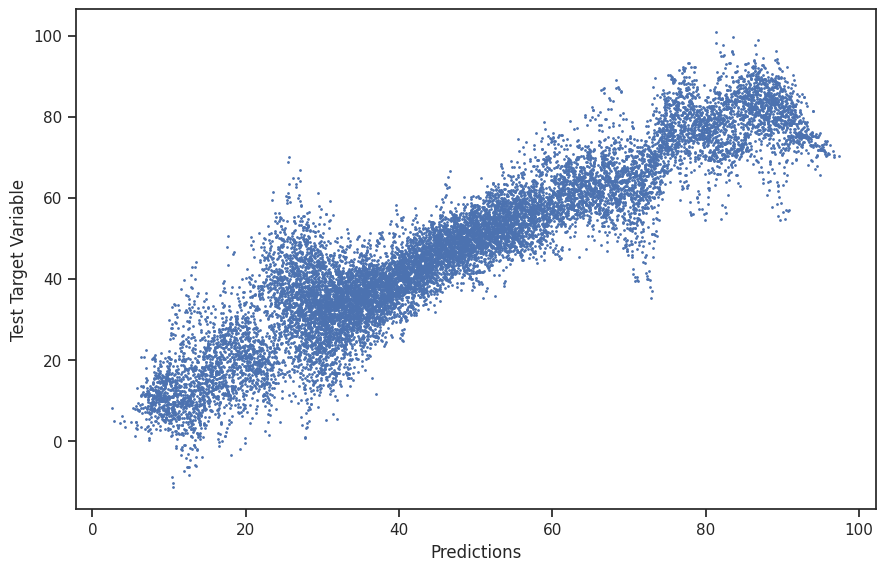

In [ ]:
# Predecting Reference values with the test dataset
y_pred = lm.predict(X_test)

# Plotting predictions vs. y_test
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlabel("Predictions")
ax.set_ylabel("Test Target Variable")
ax.plot(y_test, y_pred, 'bo', ms=1)

# Display the plot
plt.show()

Based on the above information, it appears that the model might be slightly overfitting. Overfitting occurs when a model learns the training data too well and performs poorly on unseen data.

The mean squared error (MSE) and mean absolute error (MAE) on the training dataset are slightly lower than on the test dataset. Additionally, the R-squared value on the training dataset is higher than on the test dataset.

High complexity model: Overfitting can occur when the model is too complex relative to the available data. With a large number of features (386) compared to the number of instances (53500), it's possible that the model has learned noise or irrelevant patterns in the training data.

## **PCA (Principal Component Analysis) process**

Feature Standarization

 1. perform the PCA to obtain the principal components and their corresponding explained variance

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df_x = scaler.fit_transform(df_x)
pca = PCA(0.75)
pca_vectors = pca.fit_transform(scaled_df_x)
for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)

Explained Variance ratio by Principal Component  1  :  0.14855715257210392
Explained Variance ratio by Principal Component  2  :  0.12108312979894122
Explained Variance ratio by Principal Component  3  :  0.06474442177698231
Explained Variance ratio by Principal Component  4  :  0.03774984839961066
Explained Variance ratio by Principal Component  5  :  0.03510333274248252
Explained Variance ratio by Principal Component  6  :  0.025645225528655405
Explained Variance ratio by Principal Component  7  :  0.02330954175071417
Explained Variance ratio by Principal Component  8  :  0.021428275145390387
Explained Variance ratio by Principal Component  9  :  0.017614067903705406
Explained Variance ratio by Principal Component  10  :  0.01589391279292687
Explained Variance ratio by Principal Component  11  :  0.014032726489128131
Explained Variance ratio by Principal Component  12  :  0.012871921022909665
Explained Variance ratio by Principal Component  13  :  0.0121634919283602
Explained Varianc

we are able to reduce dimensions from 384 to 52

2. perform the PCA to obtain the principal components and their corresponding explained variance

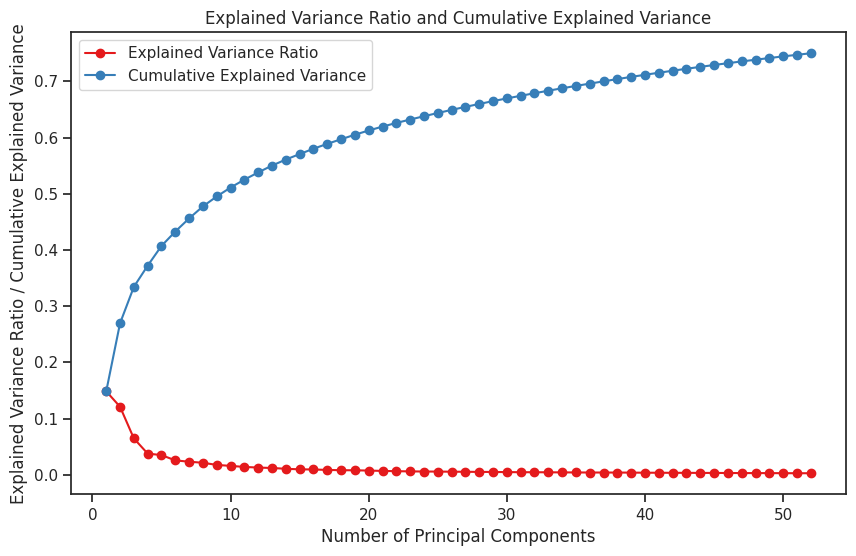

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio and cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Explained Variance Ratio')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio / Cumulative Explained Variance')
plt.title('Explained Variance Ratio and Cumulative Explained Variance')
plt.legend()
plt.show()

In [ ]:
pca_vectors = pca.fit_transform(scaled_df_x)

# Access and print the pca_vectors
print("PCA Vectors:")
print(pca_vectors)

PCA Vectors:
[[ 1.66418097e+01 -5.28637854e+00  5.90813596e+00 ...  1.47466546e+00
  -6.07350165e-03  7.87119195e-01]
 [ 1.65943085e+01 -4.94762736e+00  6.12864705e+00 ...  1.18524823e+00
  -1.03928883e-01  1.02606483e+00]
 [ 1.65927230e+01 -4.91301981e+00  6.17570643e+00 ...  1.15494987e+00
  -1.00923531e-01  8.95570094e-01]
 ...
 [-4.79214559e+00  1.42699675e+01  5.57219567e-01 ... -7.52523437e-01
   1.66459189e-01  7.02028650e-02]
 [ 1.73465338e+01 -3.01729764e+00  6.15848484e+00 ... -5.72477971e-01
  -1.88995484e-01  1.73028394e+00]
 [ 1.75212840e+01 -2.49155501e+00  5.31833961e+00 ... -4.57566760e-01
  -3.26204443e-01  1.49666375e+00]]


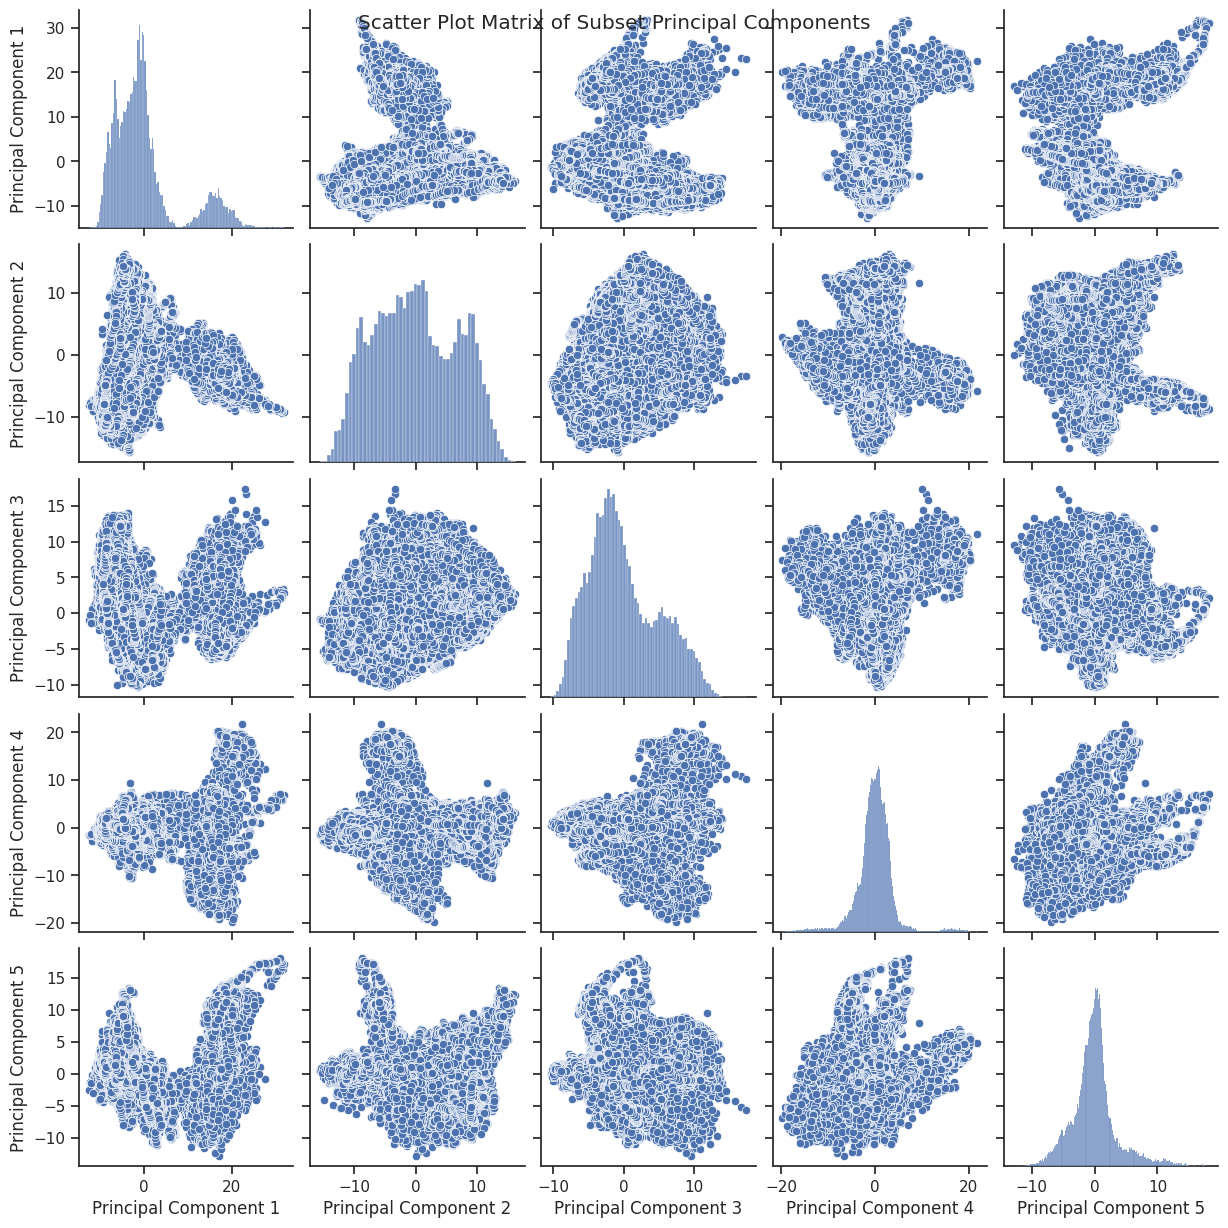

In [ ]:
import seaborn as sns

# Select a subset of principal components
subset_pca = pca_vectors[:, :5]  # Adjust the number of components as desired

# Create a DataFrame with the subset of principal components
df_subset_pca = pd.DataFrame(subset_pca, columns=[f'Principal Component {i+1}' for i in range(subset_pca.shape[1])])

# Create a scatter plot matrix
sns.set(style='ticks')
sns.pairplot(df_subset_pca)
plt.suptitle('Scatter Plot Matrix of Subset Principal Components')
plt.show()

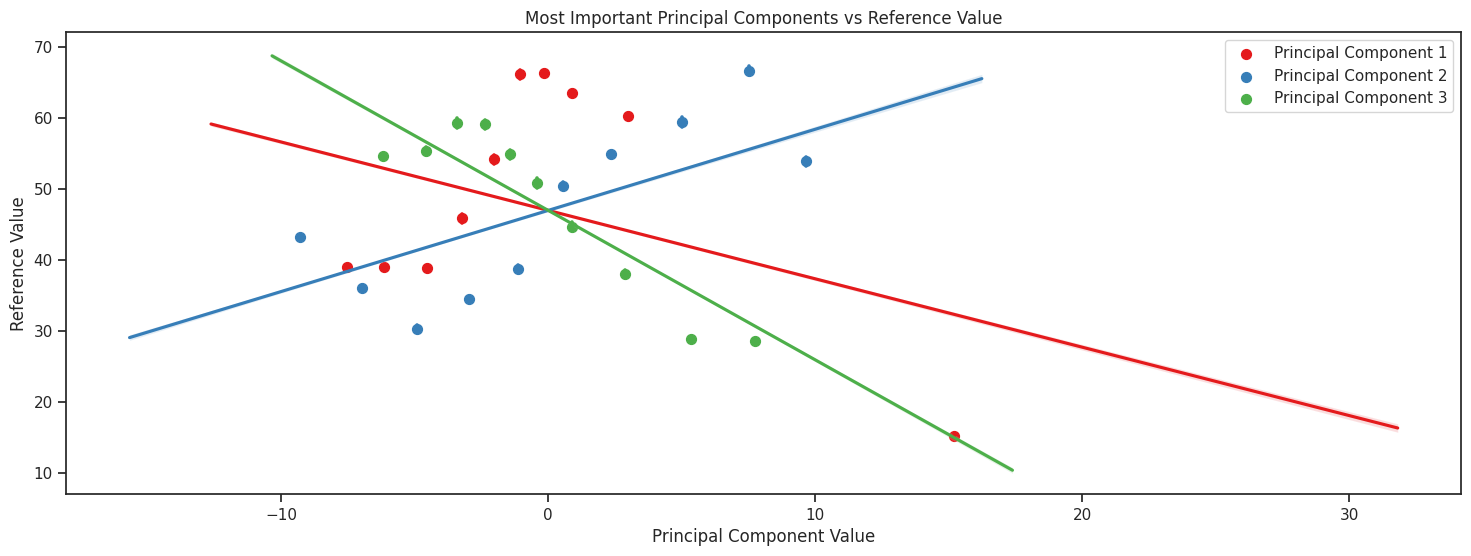

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")
sns.set_palette(palette='Set1')

fig_1 = plt.figure(figsize=(18,6))

sns.set(style="ticks")
sns.set_palette(palette='Set1')

sns.regplot(x=pca_vectors[:,0],y=df_y, label='Principal Component 1',x_bins=10)
sns.regplot(x=pca_vectors[:,1],y=df_y, label='Principal Component 2',x_bins=10)
sns.regplot(x=pca_vectors[:,2],y=df_y, label='Principal Component 3',x_bins=10)

plt.title('Most Important Principal Components vs Reference Value')
plt.xlabel('Principal Component Value')
plt.ylabel('Reference Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Assuming X_train is your feature set
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

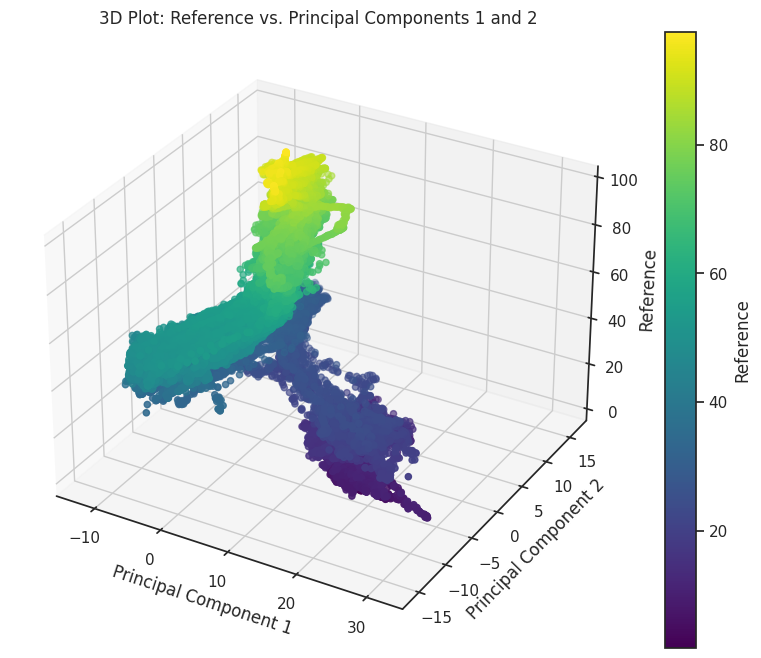

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# pca_vectors contains the transformed data after PCA

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the target variable (reference) as color gradient
sc = ax.scatter(pca_vectors[:, 0], pca_vectors[:, 1], df_y, c=df_y, cmap='viridis')

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Reference')
ax.set_title('3D Plot: Reference vs. Principal Components 1 and 2')

# Add color bar
cbar = fig.colorbar(sc)
cbar.set_label('Reference')

# Show the plot
plt.show()


# **Linear Regression with PCA features**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_x, test_x, train_y, test_y = train_test_split(pca_vectors, df_y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lm_pca = LinearRegression()
lm_pca.fit(train_x, train_y)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
#for test dataset

y_pred_linear_test_pca = lm_pca.predict(test_x)

mse = mean_squared_error(test_y, y_pred_linear_test_pca)
mae = mean_absolute_error(test_y, y_pred_linear_test_pca)
r2 = r2_score(test_y, y_pred_linear_test_pca)

print('Test Set Mean Squared Error:', mse)
print('Test Set Mean Absolute Error:', mae)
print('Test Set R-squared:', r2)

Test Set Mean Squared Error: 87.75937220286849
Test Set Mean Absolute Error: 6.881495867430069
Test Set R-squared: 0.8232425133026595


In [ ]:
#for training dataset

y_pred_linear_train_pca = lm_pca.predict(train_x)

mse = mean_squared_error(train_y, y_pred_linear_train_pca)
mae = mean_absolute_error(train_y, y_pred_linear_train_pca)
r2 = r2_score(y_train, y_pred_linear_train_pca)

print('Train Set Mean Squared Error:', mse)
print('Train Set Mean Absolute Error:', mae)
print('Train Set R-squared:', r2)

Train Set Mean Squared Error: 89.76536510098475
Train Set Mean Absolute Error: 6.93228434511436
Train Set R-squared: 0.820686825605212


# **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge = Ridge(alpha=0.3)  # You can adjust the regularization strength with the alpha parameter

# Fit the model on the training data
ridge.fit(train_x, train_y)

Ridge(alpha=0.3)

In [ ]:
# Evaluate the model on the testing set
y_pred_ridge_test = ridge.predict(test_x)

mse = mean_squared_error(test_y, y_pred_ridge_test)
mae = mean_absolute_error(test_y, y_pred_ridge_test)
r2 = r2_score(test_y, y_pred_ridge_test)

print('Test Set Mean Squared Error:', mse)
print('Test Set Mean Absolute Error:', mae)
print('Test Set R-squared:', r2)

Test Set Mean Squared Error: 87.75936425110947
Test Set Mean Absolute Error: 6.881494004018261
Test Set R-squared: 0.8232425293184183


In [ ]:
# Predict the target variable on the training set
y_pred_ridge_train = ridge.predict(train_x)

# Calculate evaluation metrics on the training set
train_mse = mean_squared_error(train_y, y_pred_ridge_train)
train_mae = mean_absolute_error(train_y, y_pred_ridge_train)
train_r2 = r2_score(train_y, y_pred_ridge_train)

print('Train Set Mean Squared Error:', train_mse)
print('Train Set Mean Absolute Error:', train_mae)
print('Train Set R-squared:', train_r2)

Train Set Mean Squared Error: 89.76536510173793
Train Set Mean Absolute Error: 6.932282934455073
Train Set R-squared: 0.8206868256037074


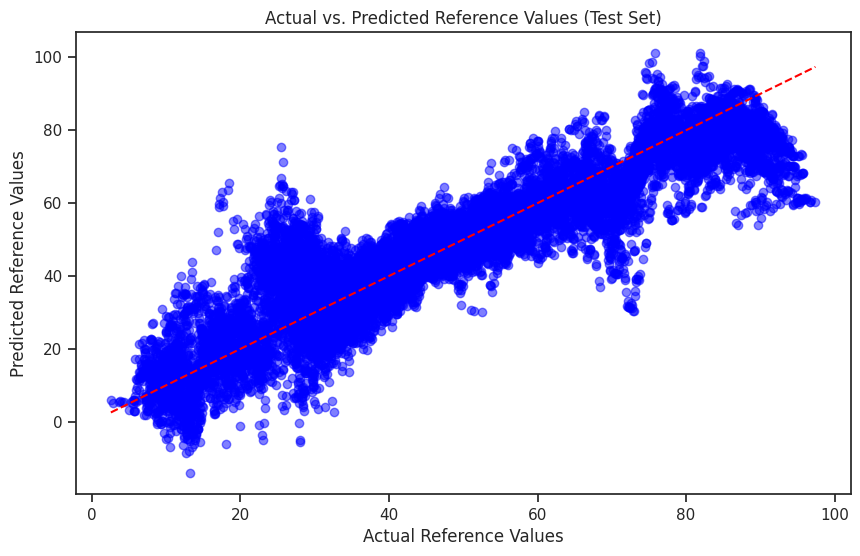

In [ ]:
import matplotlib.pyplot as plt

# Predict the target variable on the test set
y_test_pred = ridge.predict(test_x)

# Plot the predictions against the actual reference values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Reference Values')
plt.ylabel('Predicted Reference Values')
plt.title('Actual vs. Predicted Reference Values (Test Set)')
plt.show()

#**ElasticNetCV**

In [ ]:
# Fit an Elastic Net regression model
from sklearn.linear_model import ElasticNetCV
regr_en = ElasticNetCV(cv=5, alphas=[0.1, 0.3, 0.5, 0.7, 1.0])
regr_en.fit(train_x, train_y)

ElasticNetCV(alphas=[0.1, 0.3, 0.5, 0.7, 1.0], cv=5)

In [ ]:
# Evaluate the model on the testing set
y_pred_elastic_test = regr_en.predict(test_x)

mse = mean_squared_error(test_y, y_pred_elastic_test)
mae = mean_absolute_error(test_y, y_pred_elastic_test)
r2 = r2_score(test_y, y_pred_elastic_test)

print('Test Set Mean Squared Error:', mse)
print('Test Set Mean Absolute Error:', mae)
print('Test Set R-squared:', r2)

# Iterate and fine-tune the model as needed by adjusting PCA components, alpha, l1_ratio, or other parameters
# Evaluate the model's performance and repeat the process until satisfactory results are achieved.


Test Set Mean Squared Error: 87.75598081697953
Test Set Mean Absolute Error: 6.857716549194305
Test Set R-squared: 0.8232493439445739


In [ ]:
# Predict the target variable on the training set
y_pred_elastic_train = regr_en.predict(train_x)

# Calculate evaluation metrics on the training set
train_mse = mean_squared_error(train_y, y_pred_elastic_train)
train_mae = mean_absolute_error(train_y, y_pred_elastic_train)
train_r2 = r2_score(train_y, y_pred_elastic_train)

print('Train Set Mean Squared Error:', train_mse)
print('Train Set Mean Absolute Error:', train_mae)
print('Train Set R-squared:', train_r2)


Train Set Mean Squared Error: 89.9141725526254
Train Set Mean Absolute Error: 6.914168265980384
Train Set R-squared: 0.8203895713524468


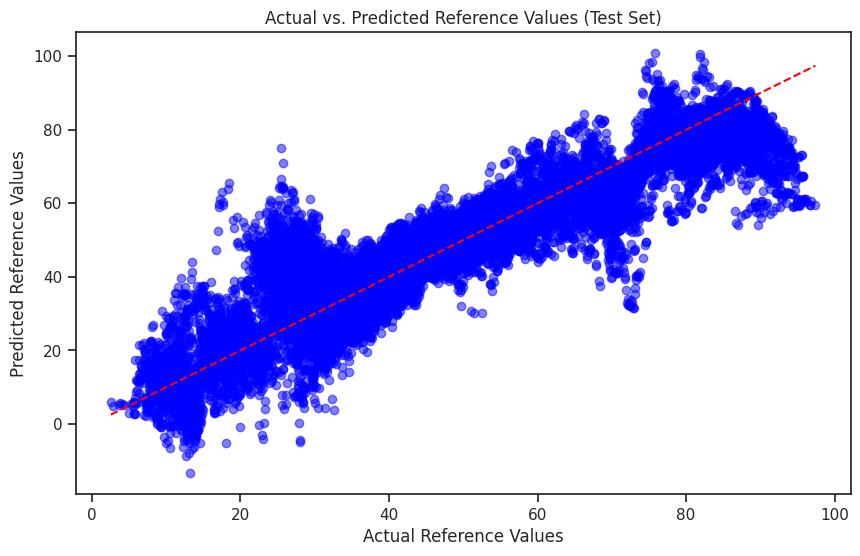

In [ ]:
import matplotlib.pyplot as plt

# Predict the target variable on the test set
y_test_pred = regr_en.predict(test_x)

# Plot the predictions against the actual reference values
plt.figure(figsize=(10, 6))
plt.scatter(test_y, y_test_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Reference Values')
plt.ylabel('Predicted Reference Values')
plt.title('Actual vs. Predicted Reference Values (Test Set)')
plt.show()


# **DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Split the data into training and testing sets (using the PCA vectors)
X_train, X_test, y_train, y_test = train_test_split(pca_vectors, df_y, test_size=0.3, random_state=42)

# Create the Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_regressor.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred_decision_test = dt_regressor.predict(X_test)

# Evaluate the model's performance on the testing set
mse = mean_squared_error(y_test, y_pred_decision_test)
mae = mean_absolute_error(y_test, y_pred_decision_test)
r2 = r2_score(y_test, y_pred_decision_test)

print('Test Set Mean Squared Error:', mse)
print('Test Set Mean Absolute Error:', mae)
print('Test Set R-squared:', r2)

Test Set Mean Squared Error: 12.940707700156338
Test Set Mean Absolute Error: 0.7184258982866043
Test Set R-squared: 0.97393592374525


In [ ]:
# Predict the target variable on the training set
y_pred_decision_train = dt_regressor.predict(X_train)

# Calculate evaluation metrics on the training set
train_mse = mean_squared_error(y_train, y_pred_decision_train)
train_mae = mean_absolute_error(y_train, y_pred_decision_train)
train_r2 = r2_score(y_train, y_pred_decision_train)

print('Train Set Mean Squared Error:', train_mse)
print('Train Set Mean Absolute Error:', train_mae)
print('Train Set R-squared:', train_r2)

Train Set Mean Squared Error: 1.979743065754344e-06
Train Set Mean Absolute Error: 1.0282376502002683e-05
Train Set R-squared: 0.999999996045312


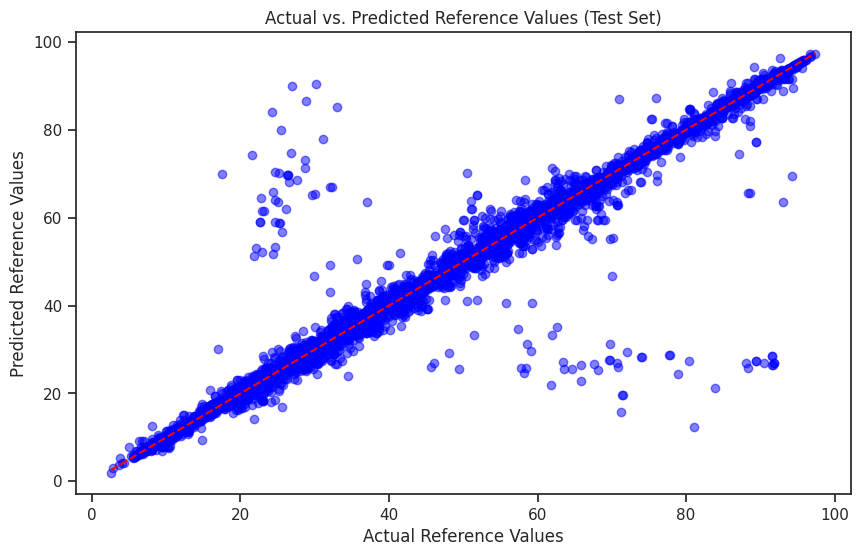

In [ ]:
import matplotlib.pyplot as plt

# Predict the target variable on the test set
y_test_pred = dt_regressor.predict(X_test)

# Plot the predictions against the actual reference values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Reference Values')
plt.ylabel('Predicted Reference Values')
plt.title('Actual vs. Predicted Reference Values (Test Set)')
plt.show()


# **Ensemble model 1**
with pca vector models

PCA input data goes to linear,ridge, elastic and decision tree model.

In [ ]:
meta_train_features = np.column_stack((y_pred_linear_train_pca, y_pred_ridge_train,
                                      y_pred_elastic_train, y_pred_decision_train))

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist,
    n_iter=10, scoring='neg_mean_squared_error',
    cv=5, verbose=1, random_state=42
)

# Perform the randomized search
random_search.fit(meta_train_features, train_y)

# Get the best hyperparameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score (Negative MSE):", best_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Score (Negative MSE): -0.005772781068002896


In [ ]:
# Meta-Model Selection and Training

# Use the best hyperparameters obtained from hyperparameter tuning
best_subsample = 1.0
best_n_estimators = 200
best_max_depth = 4
best_learning_rate = 0.1
best_colsample_bytree = 1.0

meta_model = xgb.XGBRegressor(
    subsample=best_subsample,
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    learning_rate=best_learning_rate,
    colsample_bytree=best_colsample_bytree,
    random_state=42
)

meta_model.fit(meta_train_features, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
meta_test_features = np.column_stack((y_pred_linear_test_pca, y_pred_ridge_test,
                                      y_pred_elastic_test, y_pred_decision_test))

ensemble_test_predictions = meta_model.predict(meta_test_features)

ensemble_mse = mean_squared_error(test_y, ensemble_test_predictions)
print("Test Set Ensemble MSE:", ensemble_mse)

ensemble_r2 = r2_score(test_y, ensemble_test_predictions)
print("Test Set Ensemble R-squared:", ensemble_r2)

Test Set Ensemble MSE: 12.944184390509678
Test Set Ensemble R-squared: 0.973928921290316


In [ ]:
meta_train_features = np.column_stack((y_pred_linear_train, y_pred_ridge_train,
                                      y_pred_elastic_train, y_pred_decision_train))

ensemble_train_predictions = meta_model.predict(meta_train_features)

ensemble_mse = mean_squared_error(train_y, ensemble_train_predictions)
print("Train Set Ensemble MSE:", ensemble_mse)

ensemble_r2 = r2_score(train_y, ensemble_train_predictions)
print("Train Set Ensemble R-squared:", ensemble_r2)

Train Set Ensemble MSE: 0.005679670569001276
Train Set Ensemble R-squared: 0.9999886544241412


In [65]:
# Data Preparation: Splitting dataset into training, validation, and test sets.
X_train, X_temp, y_train, y_temp = train_test_split(df_x, df_y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# **Ensemble model 2**

With new models

all models are using features that are not reduced using pca



In [66]:
# Train Base Models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
elastic_net = ElasticNetCV(cv=5)
decision_tree = DecisionTreeRegressor(max_depth=5)

In [67]:
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [69]:
# Collect Predictions on Validation Set
val_predictions_linear = linear_reg.predict(X_val)
val_predictions_ridge = ridge_reg.predict(X_val)
val_predictions_elastic = elastic_net.predict(X_val)
val_predictions_tree = decision_tree.predict(X_val)

In [70]:
# Using XGBoost as the meta-model
meta_features = np.column_stack((val_predictions_linear, val_predictions_ridge,
                                 val_predictions_elastic, val_predictions_tree))

In [72]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist,
    n_iter=10, scoring='neg_mean_squared_error',
    cv=5, verbose=1, random_state=42
)

# Perform the randomized search
random_search.fit(meta_features, y_val)

# Get the best hyperparameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score (Negative MSE):", best_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Score (Negative MSE): -36.0905718275611


In [73]:
# Meta-Model Selection and Training

# Use the best hyperparameters obtained from hyperparameter tuning
best_subsample = 1.0
best_n_estimators = 200
best_max_depth = 4
best_learning_rate = 0.1
best_colsample_bytree = 1.0

meta_model = xgb.XGBRegressor(
    subsample=best_subsample,
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    learning_rate=best_learning_rate,
    colsample_bytree=best_colsample_bytree,
    random_state=42
)

meta_model.fit(meta_features, y_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [74]:
# Predict with the Ensemble on the Test Set
test_predictions_linear = linear_reg.predict(X_test)
test_predictions_ridge = ridge_reg.predict(X_test)
test_predictions_elastic = elastic_net.predict(X_test)
test_predictions_tree = decision_tree.predict(X_test)

meta_test_features = np.column_stack((test_predictions_linear, test_predictions_ridge,
                                      test_predictions_elastic, test_predictions_tree))

ensemble_predictions = meta_model.predict(meta_test_features)

In [75]:
# Evaluation
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
print("Test Set Ensemble MSE:", ensemble_mse)

ensemble_r2 = r2_score(y_test, ensemble_predictions)
print("Test Set Ensemble R-squared:", ensemble_r2)

Test Set Ensemble MSE: 38.6631255329587
Test Set Ensemble R-squared: 0.9219275233928775
